In [1]:
import gym

import torch
import torch.autograd as autograd 

from dqn_replay import ReplayBuffer
from dqn_utils import epsilon_greedy, plot
from dqn_training import training, training_atari

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/Users/aravindkotikelapudi/opt/miniconda3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<h3>Use Cuda/GPU</h3>

In [2]:
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
Variable = lambda *args, **kwargs: autograd.Variable(*args, **kwargs).cuda() if USE_CUDA else autograd.Variable(*args, **kwargs)

print("Print CUDA:  ", USE_CUDA)
print("Device   :", device)
if USE_CUDA:
  print("Device name  ", torch.cuda.get_device_name(0))

Print CUDA:   False
Device   : cpu


<h2>Replay Buffer and Epsilon greedy imports</h2>

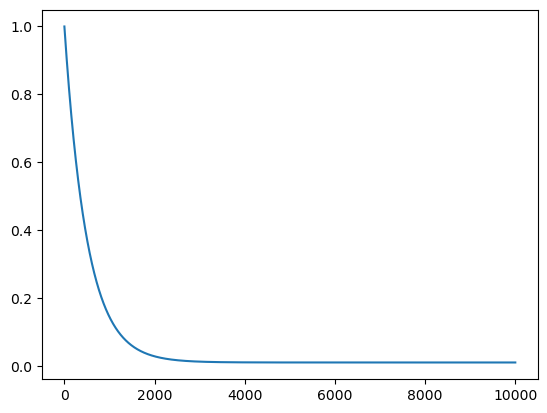

In [3]:
epsilon_greedy().plot()

<h2>Cart Pole Environment</h2>

In [4]:
env_id = "CartPole-v0"
env = gym.make(env_id)

<h2>Instantiating Deep Q Network</h2>

In [5]:
train_instantiate = training(environment=env, Variable=Variable, USE_CUDA=USE_CUDA, device=device)

<h2>Training</h2>

In [6]:
from torch.utils.tensorboard import SummaryWriter
dir = 'tests'
writer = SummaryWriter(log_dir=dir + '/discount_train')

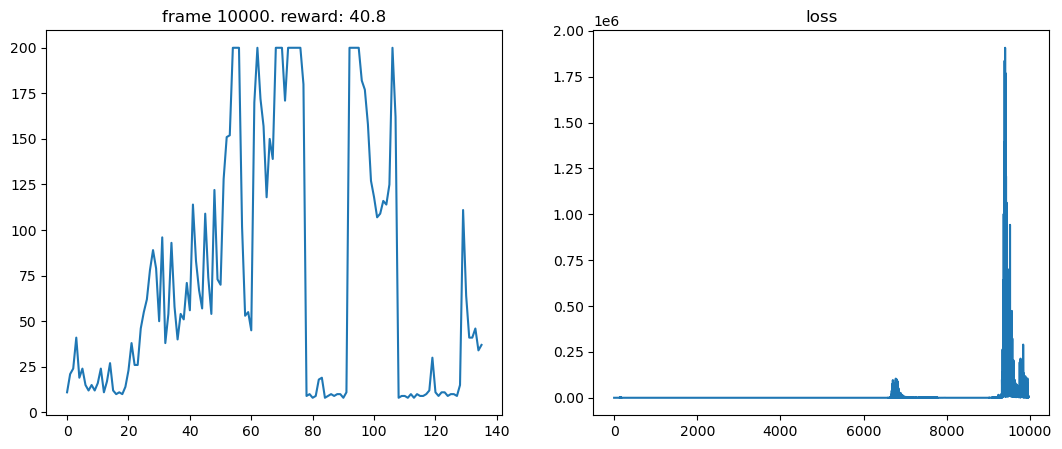

In [7]:
train_instantiate.training_loop(num_frames = 10000, batch_size=32, tensorboard=True, writer=writer)

In [8]:
for name, param in train_instantiate.model.named_parameters():
    if param.requires_grad:
        print (name, param.data)

layers.0.weight tensor([[-5.6999e-01,  7.6099e-01,  1.4196e+00, -8.7767e-02],
        [-9.9556e-02,  4.2169e-01,  8.1875e-01,  3.3020e-01],
        [ 8.4382e-01,  8.3015e-01,  1.0712e+00,  1.1993e+00],
        [-1.3966e+00, -6.5931e-01, -2.7994e+00, -1.2584e+00],
        [-4.1169e-01,  6.6460e-01,  8.9143e-01,  1.6254e-01],
        [-5.3433e-01,  6.0927e-01,  1.3651e+00,  5.1588e-01],
        [-4.1502e-02,  2.4848e-01,  5.6473e-01, -1.1416e-01],
        [ 1.1470e+00,  1.6827e+00,  5.5796e-01,  4.1786e-01],
        [ 3.1622e-01,  2.1525e-01,  1.2859e+00,  2.3813e-01],
        [-2.6722e-01,  3.0775e-01,  3.9176e-01,  3.1840e-02],
        [-2.8821e-01,  9.9400e-02,  1.6660e+00,  9.5642e-01],
        [-1.8903e+00, -1.2217e+00, -6.9454e-03,  6.1690e-02],
        [ 4.6170e-01,  7.2418e-01,  4.0233e-01,  8.7354e-02],
        [ 9.5186e-01,  1.3012e+00,  1.3746e+00,  1.6035e-01],
        [ 1.2937e+00,  4.3380e-01, -5.0077e-01, -8.5250e-01],
        [-4.1686e-01,  5.2766e-01,  5.0680e-01, -9.492

In [9]:
print(train_instantiate.gamma)

0.99


<p><hr></p>

<h1>Atari Environment</h1>

In [7]:
from common.wrappers import make_atari, wrap_deepmind, wrap_pytorch

In [8]:
import torch.optim as optim

import torch.nn.functional as F
import torch

%matplotlib inline

In [9]:
env_id = "PongNoFrameskip-v4"
env    = make_atari(env_id)
env    = wrap_deepmind(env)
env    = wrap_pytorch(env)

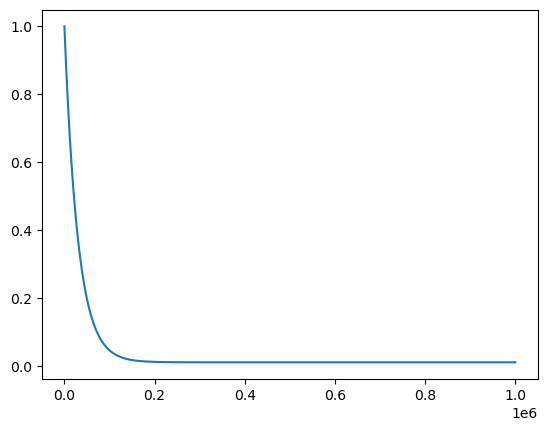

In [10]:
epsilon_greedy(epsilon_decay=30000).plot(plot_range=1000000)

In [12]:
atari_instantiate = training_atari(environment=env, Variable=Variable,
                                    USE_CUDA=USE_CUDA, device=device)

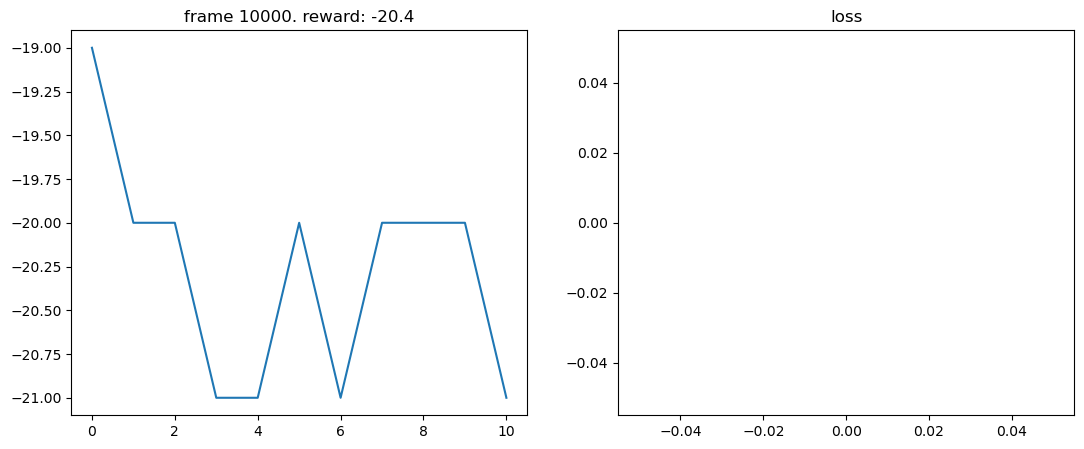

KeyboardInterrupt: 

In [13]:
atari_instantiate.training_loop(num_frames=1400000, batch_size=32, tensorboard=False)

## Training Rewards and Losses 

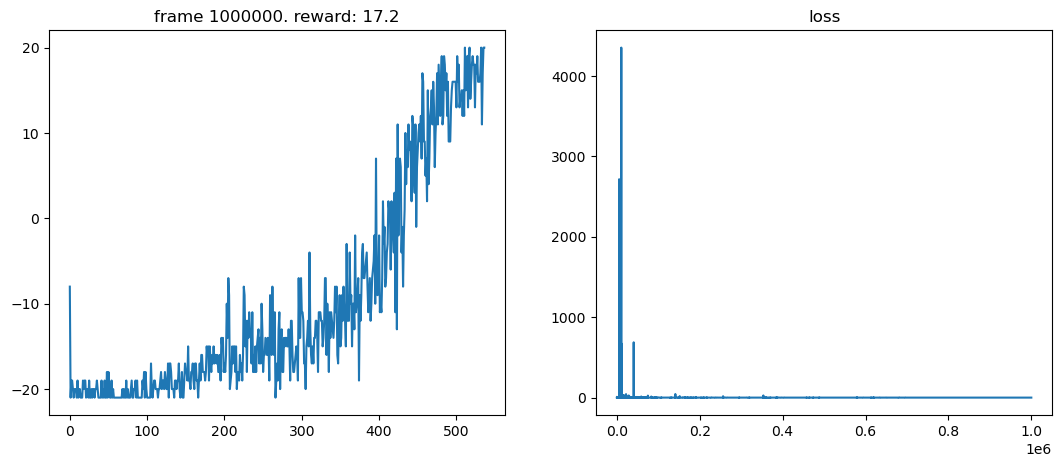

: 

: 

In [23]:
#This is what the training rewards and losses should look like